In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data
Dataset ชุดนี้ได้นำมาจากเว็บไซต์ Kaggle โดยสามารถดาวโหลดได้ที่ [Popular Video Games](https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games)

In [392]:
df = pd.read_csv('preprocessed_backloggd_games.csv',delimiter=",")
df

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Date,Genres
0,4.5,21K,4.1K,5.6K,5.5K,4.6K,3K,"Feb 25, 2022","['Adventure', 'RPG']"
1,4.4,35K,3.1K,5.6K,3K,5.1K,3K,"Mar 03, 2017","['Adventure', 'Puzzle']"
2,4.3,25K,3.5K,7.3K,4K,3.2K,2.1K,"Dec 07, 2018","['Adventure', 'Brawler', 'Indie', 'RPG']"
3,4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']"
4,4.2,32K,728,5.7K,2.1K,3.9K,2.5K,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
...,...,...,...,...,...,...,...,...,...
31654,3.2,0,0,0,0,0,0,TBD,[]
31655,3.2,0,0,0,0,0,0,"May 11, 2018","['Indie', 'Simulator']"
31656,3.2,0,0,0,0,0,0,TBD,[]
31657,3.2,0,0,0,0,0,0,TBD,"['Indie', 'RPG', 'Simulator', 'Strategy']"


จากข้อมูลที่เรานำมาจะเห็นปัญหาอยู่ 2 อย่าง นั่นคือ
- ข้อมูลมี Missing Value (สังเกตุจากการมี `NaN` ที่ Attribute: Rating)
- ข้อมูลซ้ำกัน (สังเกตุจากแถวที่ 59996 และ 59999)
โดยเราจะเริ้มแก้ไขจากการนำข้อมูลซ้ำกันออกไปก่อน

In [393]:
# Remove duplicate titles
# df.drop_duplicates(subset=["Title"],inplace=True)
# df

ตอนนี้เรากำจัดข้อมูลที่มีการซ้ำกันออกไปหมดแล้ว ต่อไปก็จะเป็นการจัดการกับ Missing Value โดยแผนเราก็คือจะเติมให้กับข้อมูลที่เป็น Numerical เท่านั้น (เนื่องจากเรามีส่วนวิเคราะห์ข้อมูลที่เป็น Categorical แค่แถว Genres) โดยเติมให้เป็นค่าเฉลี่ยของมัน  

แต่เนื่องจากแถวข้อมูลที่เป็น Numerical ก็ยังไม่เป็นข้อมูลตัวเลขจริงๆ เนื่องจากถูกเขียนมาในรูปที่ติด K เราจึงต้องมาแปลงมันเป็นตัวเลขจริงๆ กันก่อน

In [394]:
def kUnitToNumber(text):
    if type(text) != str:
        return text
    elif text[-1].lower() == 'k':
        return int(float(text[:-1]) * 1000)
    else:
        return int(float(text))
    
df["Plays"] = df["Plays"].apply(kUnitToNumber)
df["Playing"] = df["Playing"].apply(kUnitToNumber)
df["Backlogs"] = df["Backlogs"].apply(kUnitToNumber)
df["Wishlist"] = df["Wishlist"].apply(kUnitToNumber)
df["Lists"] = df["Lists"].apply(kUnitToNumber)
df["Reviews"] = df["Reviews"].apply(kUnitToNumber)

df

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Date,Genres
0,4.5,21000,4100,5600,5500,4600,3000,"Feb 25, 2022","['Adventure', 'RPG']"
1,4.4,35000,3100,5600,3000,5100,3000,"Mar 03, 2017","['Adventure', 'Puzzle']"
2,4.3,25000,3500,7300,4000,3200,2100,"Dec 07, 2018","['Adventure', 'Brawler', 'Indie', 'RPG']"
3,4.4,25000,2700,9600,2600,3400,2100,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']"
4,4.2,32000,728,5700,2100,3900,2500,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
...,...,...,...,...,...,...,...,...,...
31654,3.2,0,0,0,0,0,0,TBD,[]
31655,3.2,0,0,0,0,0,0,"May 11, 2018","['Indie', 'Simulator']"
31656,3.2,0,0,0,0,0,0,TBD,[]
31657,3.2,0,0,0,0,0,0,TBD,"['Indie', 'RPG', 'Simulator', 'Strategy']"


แปลงข้อมูลเป็นตัวเลขจริงๆแล้ว ก็ถึงเวลาเติมค่า Missing Value

In [395]:
df["Plays"].fillna(int(df["Plays"].mean()), inplace=True)
df["Playing"].fillna(int(df["Playing"].mean()),inplace=True)
df["Backlogs"].fillna(int(df["Backlogs"].mean()),inplace=True)
df["Wishlist"].fillna(int(df["Wishlist"].mean()),inplace=True)
df["Lists"].fillna(int(df["Lists"].mean()),inplace=True)
df["Reviews"].fillna(int(df["Reviews"].mean()),inplace=True)

df["Rating"].fillna((df["Rating"].mean()),inplace=True)
df["Rating"] = df["Rating"].round(1)
df


,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Date,Genres
0,4.5,21000,4100,5600,5500,4600,3000,"Feb 25, 2022","['Adventure', 'RPG']"
1,4.4,35000,3100,5600,3000,5100,3000,"Mar 03, 2017","['Adventure', 'Puzzle']"
2,4.3,25000,3500,7300,4000,3200,2100,"Dec 07, 2018","['Adventure', 'Brawler', 'Indie', 'RPG']"
3,4.4,25000,2700,9600,2600,3400,2100,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']"
4,4.2,32000,728,5700,2100,3900,2500,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra..."
...,...,...,...,...,...,...,...,...,...
31654,3.2,0,0,0,0,0,0,TBD,[]
31655,3.2,0,0,0,0,0,0,"May 11, 2018","['Indie', 'Simulator']"
31656,3.2,0,0,0,0,0,0,TBD,[]
31657,3.2,0,0,0,0,0,0,TBD,"['Indie', 'RPG', 'Simulator', 'Strategy']"


เนื่องจากเราอยากวิเคราะห์ข้อมูลปีที่เกมออกวางขายด้วย เราจึงจะเพิ่ม Attribute นี้เข้าไปในข้อมูลของเราด้วย โดยเราจะพิจารณาจาก Attribute: Release_Date  
โดยใน Attribute: Release_Date จะมีค่าพิเศษที่นอกจาก วัน/เดือน/ปี ก็คือ TBD (To be determined) โดยเราจะถือว่าเกมเหล่านี้จะออกตัวในปี ค.ศ. 2024

In [396]:
def getReleaseYear(releaseDate):
    if releaseDate == "TBD":
        return 2024
    return int(releaseDate.split(',')[1])

df["Release Year"] = df["Release_Date"].apply(getReleaseYear)

df

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Date,Genres,Release Year
0,4.5,21000,4100,5600,5500,4600,3000,"Feb 25, 2022","['Adventure', 'RPG']",2022
1,4.4,35000,3100,5600,3000,5100,3000,"Mar 03, 2017","['Adventure', 'Puzzle']",2017
2,4.3,25000,3500,7300,4000,3200,2100,"Dec 07, 2018","['Adventure', 'Brawler', 'Indie', 'RPG']",2018
3,4.4,25000,2700,9600,2600,3400,2100,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']",2017
4,4.2,32000,728,5700,2100,3900,2500,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",2015
...,...,...,...,...,...,...,...,...,...,...
31654,3.2,0,0,0,0,0,0,TBD,[],2024
31655,3.2,0,0,0,0,0,0,"May 11, 2018","['Indie', 'Simulator']",2018
31656,3.2,0,0,0,0,0,0,TBD,[],2024
31657,3.2,0,0,0,0,0,0,TBD,"['Indie', 'RPG', 'Simulator', 'Strategy']",2024


In [397]:
df_numerical = df[["Rating","Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews","Release Year"]]
df_numerical.head()

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release Year
0,4.5,21000,4100,5600,5500,4600,3000,2022
1,4.4,35000,3100,5600,3000,5100,3000,2017
2,4.3,25000,3500,7300,4000,3200,2100,2018
3,4.4,25000,2700,9600,2600,3400,2100,2017
4,4.2,32000,728,5700,2100,3900,2500,2015


In [406]:
# Detect outlier with IQR method
# Q1 = df_numerical.quantile(0.25)
# Q3 = df_numerical.quantile(0.75)
# IQR = Q3 - Q1

# Remove outlier
# df_noout = df_numerical[~((df_numerical < (Q1 - 1.5 * IQR)) |(df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_noout

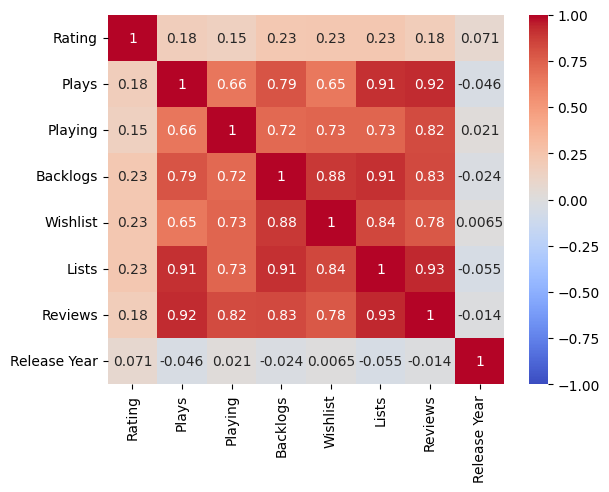

In [399]:
correlation = df_numerical.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [400]:
df['Genres'] = df['Genres'].str.strip('[]').str.split(', ')
df['Genres'] = df['Genres'].apply(lambda row: [i for i in row if i])
pop_genres_df = df.explode('Genres')
pop_genres_df = pop_genres_df.replace('', np.nan)
pop_genres_df.dropna(subset=['Genres'], inplace=True)
pop_genres_df

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Date,Genres,Release Year
0,4.5,21000,4100,5600,5500,4600,3000,"Feb 25, 2022",'Adventure',2022
0,4.5,21000,4100,5600,5500,4600,3000,"Feb 25, 2022",'RPG',2022
1,4.4,35000,3100,5600,3000,5100,3000,"Mar 03, 2017",'Adventure',2017
1,4.4,35000,3100,5600,3000,5100,3000,"Mar 03, 2017",'Puzzle',2017
2,4.3,25000,3500,7300,4000,3200,2100,"Dec 07, 2018",'Adventure',2018
...,...,...,...,...,...,...,...,...,...,...
31657,3.2,0,0,0,0,0,0,TBD,'Indie',2024
31657,3.2,0,0,0,0,0,0,TBD,'RPG',2024
31657,3.2,0,0,0,0,0,0,TBD,'Simulator',2024
31657,3.2,0,0,0,0,0,0,TBD,'Strategy',2024


<Axes: ylabel='Genres'>

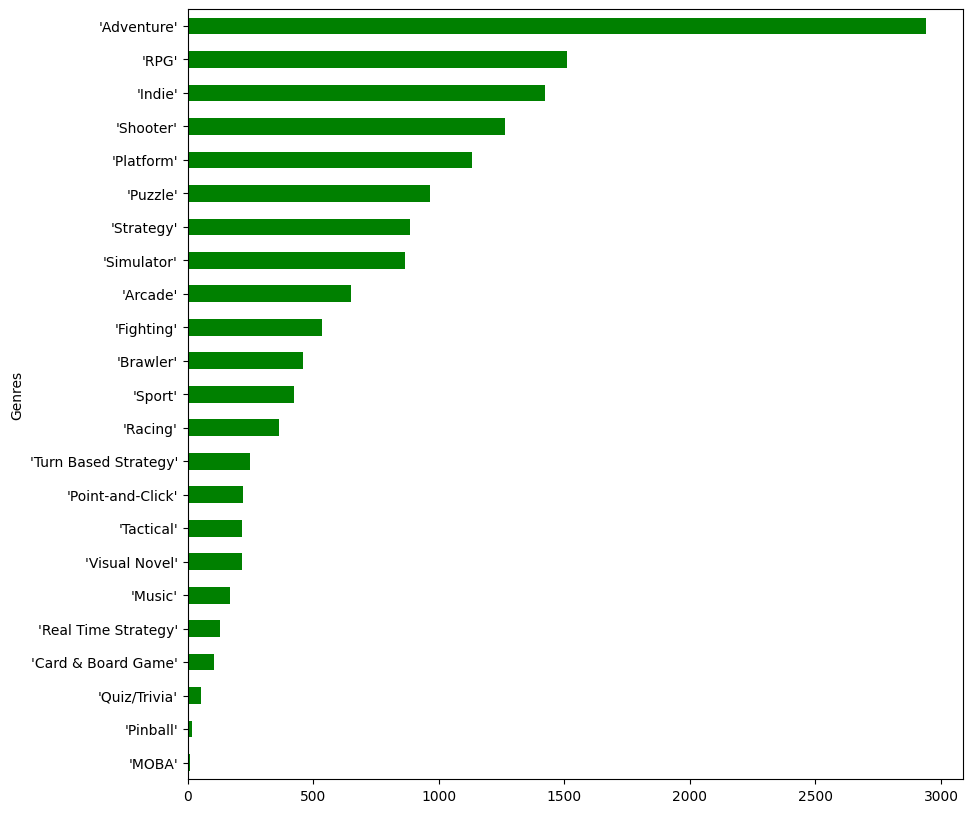

In [409]:
plays_percentile_80 = df["Plays"].quantile(0.80)

df_popular = pop_genres_df[pop_genres_df["Plays"] >= plays_percentile_80]
# df_popular = df_popular[df_popular["Rating"] >= 4]
# df_popular = df_popular[df_popular["Release Year"] >= 2020]
df_popular

countByGenres = df_popular.groupby("Genres")["Rating"].count()
countByGenres.sort_values(ascending=True, inplace=True)
countByGenres.plot(kind="barh", figsize=(10, 10), color="green")

Text(0, 0.5, 'Total Plays')

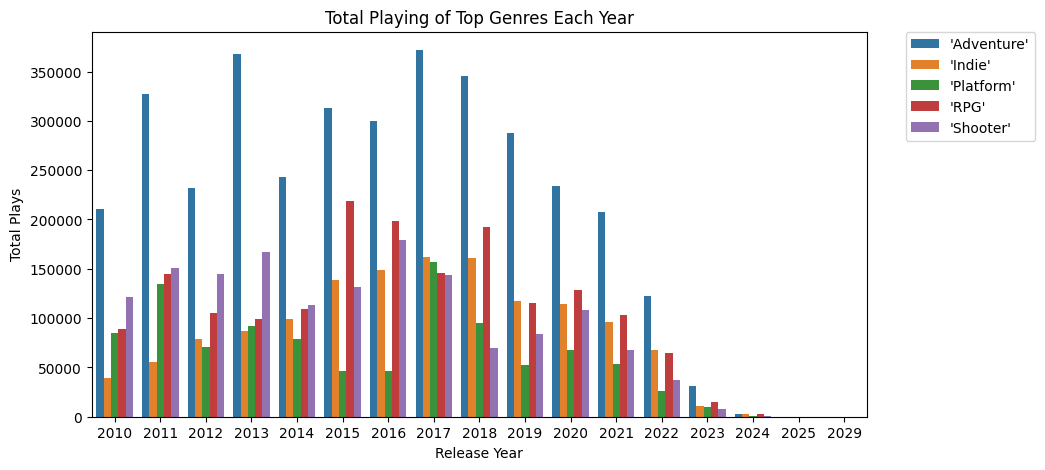

In [413]:
df_top_genres = pop_genres_df[pop_genres_df["Genres"].str.contains("Adventure|Indie|RPG|Platform|Shooter")]
df_top_genres = df_top_genres[df_top_genres["Release Year"] >= 2010]

total_play_each_year = df_top_genres.groupby(["Release Year","Genres"])["Plays"].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=total_play_each_year.index.get_level_values(0), y=total_play_each_year.values, hue=total_play_each_year.index.get_level_values(1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Total Playing of Top Genres Each Year")
plt.ylabel("Total Plays")

Text(0, 0.5, 'Total Released')

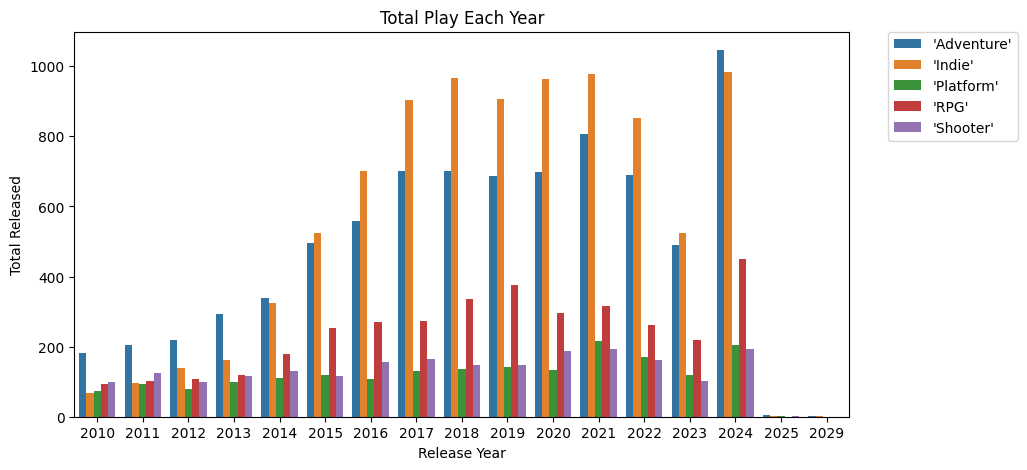

In [414]:
total_play_each_year = df_top_genres.groupby(["Release Year","Genres"])["Plays"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=total_play_each_year.index.get_level_values(0), y=total_play_each_year.values, hue=total_play_each_year.index.get_level_values(1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Total Play Each Year")
plt.ylabel("Total Released")

บันทึกเป็น csv เพื่อเตรียมการทำ Train/Test ใน RapidMiner ต่อไป

In [416]:
df.to_csv("transformed_backlogged_games.csv")